### Adding libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Checking overview of the data

In [ ]:
df = pd.read_csv('Dataset/kddcup.data.corrected', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
# Add columns name
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [ ]:
df.columns = columns

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Category
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(4898431, 42)

In [ ]:
df.Category.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [ ]:
df['Category'] = np.where(df.Category == 'normal.', 0,1)

In [ ]:
le = LabelEncoder()

In [ ]:
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service']= le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

In [ ]:
df[['protocol_type','service','flag']].head()

,protocol_type,service,flag
0,1,24,9
1,1,24,9
2,1,24,9
3,1,24,9
4,1,24,9


In [ ]:
X = df.iloc[:,:41]
y = df.iloc[:,-1]

In [ ]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,24,9,215,45076,0,0,0,0,...,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,1,24,9,162,4528,0,0,0,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,1,24,9,236,1228,0,0,0,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,1,24,9,233,2032,0,0,0,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,1,24,9,239,486,0,0,0,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
y.unique()

array([0, 1])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 13,test_size = 0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3428901, 41)
(1469530, 41)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(3428901,)
(1469530,)


In [ ]:
# Scale data
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# PCA
# pca = PCA(random_state=13)

In [ ]:
# pca.fit(X_train_scaled)

In [ ]:
# fig, ax = plt.subplots()
# ax.bar(range(X_train_scaled.shape[1]), pca.explained_variance_ratio_)
# ax.plot(range(X_train_scaled.shape[1]), np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel("PC components")
# plt.ylabel("Variance retention")

In [ ]:
# Chon n_components = 20 de decomposition
# pca = PCA(random_state=13, n_components=20)

In [ ]:
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# print(X_train_pca.shape, X_test_pca.shape)

In [ ]:
# print(y_train.shape, y_test.shape)

### Build model

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=[41]),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
eary_stoping = EarlyStopping(    
    monitor = 'val_accuracy',
    mode = 'max',
    min_delta=1,
    patience = 5,
    restore_best_weights=True
)

In [ ]:
mc = ModelCheckpoint(
    '/content/drive/MyDrive/LDS8_K279_ONLINE_Nguyen_Minh_Hung/LDS8_K279_NguyenMinhHung_Cuoi_ky/Dataset/best_model_ANN_cau_2.h5', 
    monitor='val_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True
    )


In [ ]:
history = model.fit(
    x=X_train_scaled, y=y_train,
    validation_data = (X_test_scaled, y_test),
    batch_size = 64,
    epochs = 100,
    callbacks = [eary_stoping, mc],
    verbose = 1
)

Epoch 1/100
53570/53577 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9997
Epoch 1: val_accuracy improved from -inf to 0.99962, saving model to /content/drive/MyDrive/LDS8_K279_ONLINE_Nguyen_Minh_Hung/LDS8_K279_NguyenMinhHung_Cuoi_ky/Dataset/best_model_ANN_cau_2.h5
53577/53577 [==============================] - 156s 3ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0038 - val_accuracy: 0.9996
Epoch 2/100
53553/53577 [============================>.] - ETA: 0s - loss: 9.4357e-04 - accuracy: 0.9997
Epoch 2: val_accuracy improved from 0.99962 to 0.99969, saving model to /content/drive/MyDrive/LDS8_K279_ONLINE_Nguyen_Minh_Hung/LDS8_K279_NguyenMinhHung_Cuoi_ky/Dataset/best_model_ANN_cau_2.h5
53577/53577 [==============================] - 156s 3ms/step - loss: 9.4355e-04 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 3/100
53561/53577 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 3: val_accuracy improved

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                672       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 989
Trainable params: 989
Non-trainable params: 0
_________________________________________________________________


In [ ]:
_, accuracy = model.evaluate(X_test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))

45923/45923 [==============================] - 75s 2ms/step - loss: 0.0038 - accuracy: 0.9996
Accuracy: 99.96


NX: Do chinh xac cua model tuong doi cao. Model co the su dung duoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


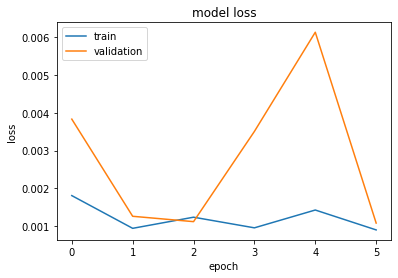

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)

45923/45923 [==============================] - 62s 1ms/step


In [ ]:
y_pred[:5]

array([[1.0000000e+00],
       [1.0000000e+00],
       [6.5021254e-08],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

### Predict dataset

In [8]:
from keras.models import load_model

In [9]:
model = load_model('/content/drive/MyDrive/LDS8_K279_ONLINE_Nguyen_Minh_Hung/LDS8_K279_NguyenMinhHung_Cuoi_ky/Dataset/best_model_ANN_cau_2.h5')

In [10]:
df_unlabeled = pd.read_csv('/content/drive/MyDrive/LDS8_K279_ONLINE_Nguyen_Minh_Hung/LDS8_K279_NguyenMinhHung_Cuoi_ky/Dataset/kddcup.testdata.unlabeled', header=None)
df_unlabeled.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,udp,private,SF,105,146,0,0,0,0,...,1,1,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [11]:
# Add columns name
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [12]:
df_unlabeled.columns = columns

In [13]:
df_unlabeled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,private,SF,105,146,0,0,0,0,...,1,1,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [14]:
le = LabelEncoder()

In [15]:
df_unlabeled['protocol_type'] = le.fit_transform(df_unlabeled['protocol_type'])
df_unlabeled['service']= le.fit_transform(df_unlabeled['service'])
df_unlabeled['flag'] = le.fit_transform(df_unlabeled['flag'])

In [16]:
X_new = df_unlabeled.iloc[:,:41]

In [17]:
X_new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,50,9,105,146,0,0,0,0,...,1,1,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0
1,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,2,50,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [18]:
scaler = StandardScaler()

In [19]:
scaler = scaler.fit(X_new)

In [20]:
X_new_scaled = scaler.transform(X_new)

In [21]:
y_new = model.predict(X_new_scaled)

93255/93255 [==============================] - 128s 1ms/step


In [22]:
y_new

array([[6.3090295e-01],
       [1.6350721e-06],
       [1.6350721e-06],
       ...,
       [1.8063746e-06],
       [1.6441899e-06],
       [1.7592405e-06]], dtype=float32)

In [23]:
df_unlabeled['Predicted'] = np.where(y_new < 0.5  , 'normal.', 'others')

In [24]:
df_unlabeled.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Predicted
0,0,2,50,9,105,146,0,0,0,0,...,1,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,others
1,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
4,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
5,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
6,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
7,0,2,50,9,105,146,0,0,0,0,...,253,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
8,0,2,50,9,105,146,0,0,0,0,...,253,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
9,0,2,50,9,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [25]:
df_unlabeled['Predicted'].value_counts()

others     2261221
normal.     722933
Name: Predicted, dtype: int64